In [1]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test,y_test)=keras.datasets.fashion_mnist.load_data()

In [3]:
print((x_train.shape, y_train.shape),(x_test.shape,y_test.shape))

((60000, 28, 28), (60000,)) ((10000, 28, 28), (10000,))


In [4]:
x_train=x_train/255
x_test=x_test/255

In [5]:
model=keras.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)), #32,26,26
    keras.layers.MaxPooling2D((2,2)), #32,13,13

    keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'), #32,64,11,11
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7647 - loss: 0.6514
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8800 - loss: 0.3298
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8993 - loss: 0.2760
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9074 - loss: 0.2490
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9194 - loss: 0.2174
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9275 - loss: 0.1977
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9335 - loss: 0.1810
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9379 - loss: 0.1656
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9431 - loss: 0.1505
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9515 - loss: 0.1317


In [8]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9055 - loss: 0.2854


[0.279390811920166, 0.9067000150680542]

Using Data Augmentation

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmentator=ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2
)

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [12]:
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_test.shape

(10000, 28, 28, 1)

In [13]:
augmentator.fit(x_train)
augmentator.fit(x_test)

In [14]:
augment=augmentator.flow(x_train,y_train)
augment=augmentator.flow(x_test,y_test)

In [15]:
augment[0][0].shape

(32, 28, 28, 1)

In [16]:
augment[0][0][1].shape

(28, 28, 1)

Text(0.5, 1.0, '4')

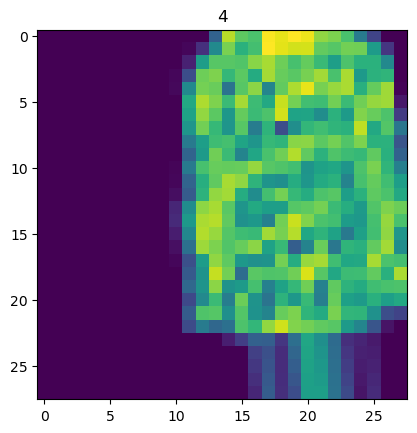

In [18]:
import matplotlib.pyplot as plt
plt.imshow(augment[0][0][1])
plt.title(augment[0][1][1])

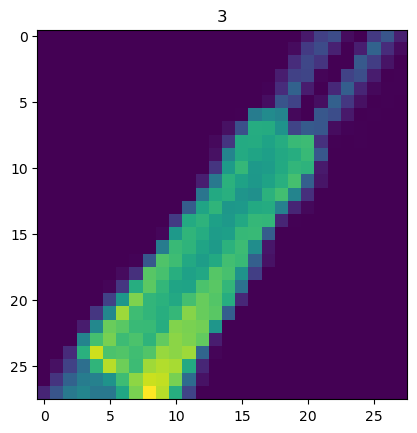

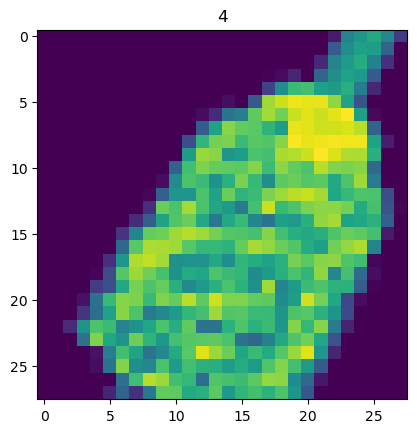

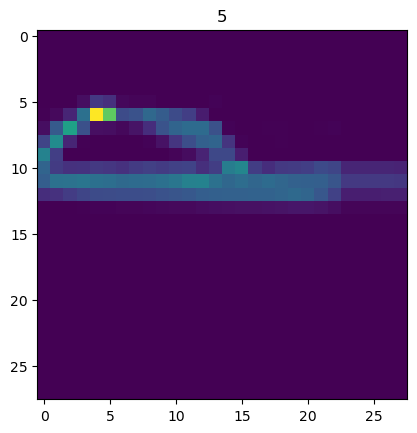

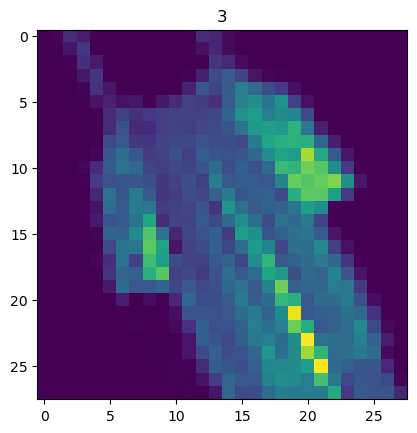

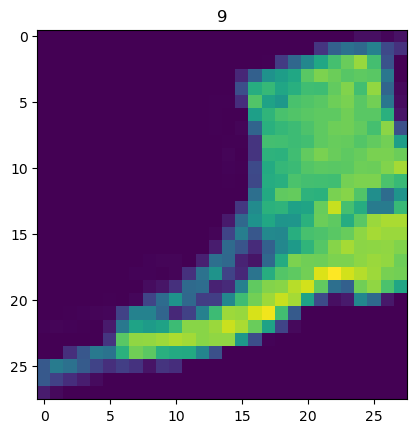

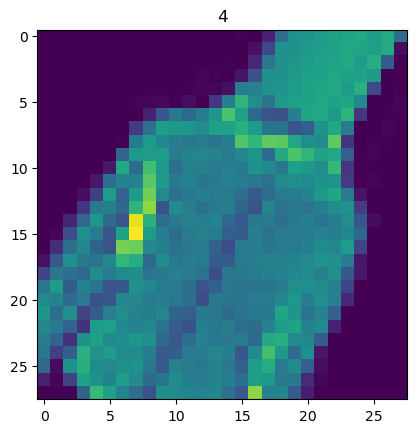

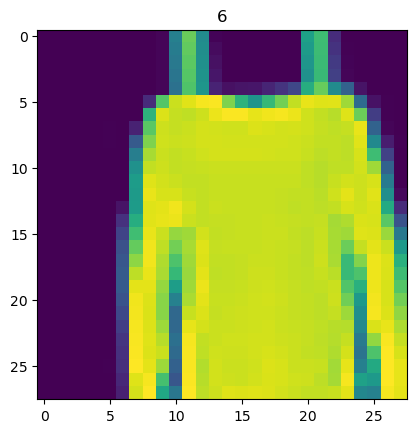

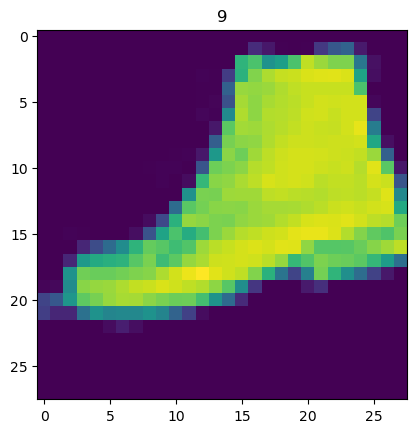

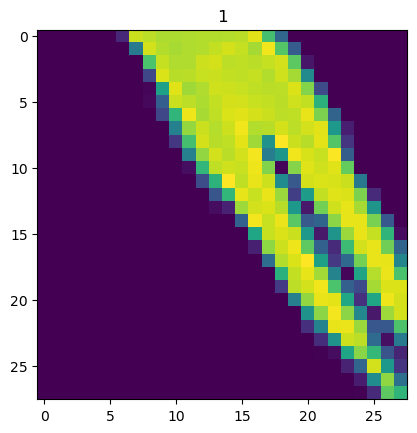

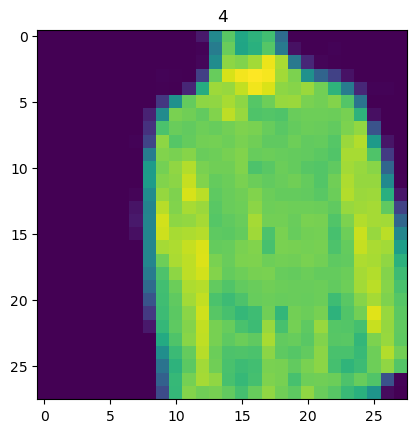

In [20]:
for i in range(10):
    plt.imshow(augment[0][0][i])
    plt.title(augment[0][1][i])
    plt.show()

In [21]:
model2=keras.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)), #32,26,26
    keras.layers.MaxPooling2D((2,2)), #32,13,13

    keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'), #32,64,11,11
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
model2.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7571 - loss: 0.6581
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8815 - loss: 0.3281
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8981 - loss: 0.2789
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9110 - loss: 0.2439
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9225 - loss: 0.2140
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9306 - loss: 0.1876
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9363 - loss: 0.1731
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9443 - loss: 0.1513
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9482 - loss: 0.1364
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9540 - loss: 0.1233


In [24]:
model2.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9115 - loss: 0.3051


[0.2842522859573364, 0.9122999906539917]